Docstring

In [1]:
""""""

''

Importamos librerias

In [2]:
import warnings
from math import floor
import pandas as pd
import numpy as np

Lectura de datos en csv o en  excel

In [3]:
def read_data(filename, targetcol = 'VALUE', datecol = 'DATE', sep = ';', 
              decimal = ',', date_format = "%d/%m/%Y %H:%M:%S.%f", freq = '1T'):
    
    if filename[-3:] == 'csv' or filename[-3:] == 'txt':
        file_ = pd.read_table(filename, sep = sep, decimal = decimal, parse_dates = False)
        file_parsed = parsedates(file_, date_format = date_format, freq = freq, datecol = datecol)
        
    elif filename[-3:] == 'xls' or filename[-3:] == 'lsx':
        file_ = pd.read_excel(filename, parse_dates = False)
        file_parsed = parsedates(file_, date_format = date_format, freq = freq,datecol = datecol)
        
    else:
        raise NotImplementedError("This file type is not supported" )
    
    return(file_parsed[targetcol])

    

Leer y interpolar las time series para ver como van

In [4]:
def parsedates(file_, date_format, freq, datecol):
    freq = pd.to_timedelta(freq)
    datetime_i = pd.to_datetime(file_[datecol], format = date_format)
    print(type(datetime_i.iloc[-1]))
    if freq < (datetime_i.iloc[1] - datetime_i.iloc[0]):
        raise ValueError('Expected frequency is smaller than dataset information')
        
    file_.index = datetime_i
    desired_index = pd.date_range(start = datetime_i.iloc[0], end = datetime_i.iloc[-1], freq = freq)
    
    file_int = file_.reindex(file_.index.union(desired_index)).interpolate(method = 'time').reindex(desired_index)
    
    return(file_int)

---------

Prueba Datos Michelin

In [5]:
filename = 'NIVEL2_TOTAL_AIRE_INST_FILT.csv'
freq = '5s'

In [6]:
data = read_data(filename, freq = freq)

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


In [7]:
print(data)

2019-05-20 17:58:56    13150.540000
2019-05-20 17:59:01    13020.720000
2019-05-20 17:59:06    13158.000000
2019-05-20 17:59:11    13087.900000
2019-05-20 17:59:16    12992.900000
                           ...     
2019-06-21 12:22:36    15497.010618
2019-06-21 12:22:41    15301.722286
2019-06-21 12:22:46    15161.933911
2019-06-21 12:22:51    15113.357854
2019-06-21 12:22:56    15499.252220
Freq: 5S, Name: VALUE, Length: 548929, dtype: float64


In [8]:
import matplotlib.pyplot as plt

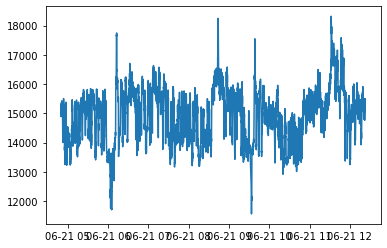

In [9]:
plt.plot(data.iloc[floor(len(data)/1.01):len(data)])

Prueba datos seat

In [10]:
filename = 'Seat.csv'

freq = '20T'

In [11]:
data = read_data(filename='Seat.csv',
                 freq='20T',
                 targetcol='INSTALACIONES [kWh]',
                 datecol='MSJO_DATUM',
                 sep=',',
                 decimal='.',
                 date_format="%d/%m/%Y %H:%M")


<class 'pandas._libs.tslibs.timestamps.Timestamp'>


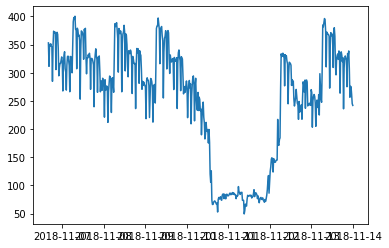

In [12]:
plt.plot(data.iloc[floor(len(data)/1.01):len(data)])

In [13]:
print(data)
sum(data.isna())

2016-11-04 16:30:00    429.136414
2016-11-04 16:50:00    439.819132
2016-11-04 17:10:00    422.681010
2016-11-04 17:30:00    432.827713
2016-11-04 17:50:00    427.453792
                          ...    
2018-11-13 22:30:00    276.036780
2018-11-13 22:50:00    275.003310
2018-11-13 23:10:00    261.639657
2018-11-13 23:30:00    245.255448
2018-11-13 23:50:00    242.053699
Freq: 20T, Name: INSTALACIONES [kWh], Length: 53231, dtype: float64


0